In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('mcdonalds.csv')

In [3]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
data.shape

(1453, 15)

In [9]:
x= pd.DataFrame(data.iloc[:,0:11])

In [10]:
print(x.isna().sum())

yummy         0
convenient    0
spicy         0
fattening     0
greasy        0
fast          0
cheap         0
tasty         0
expensive     0
healthy       0
disgusting    0
dtype: int64


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   yummy       1453 non-null   object
 1   convenient  1453 non-null   object
 2   spicy       1453 non-null   object
 3   fattening   1453 non-null   object
 4   greasy      1453 non-null   object
 5   fast        1453 non-null   object
 6   cheap       1453 non-null   object
 7   tasty       1453 non-null   object
 8   expensive   1453 non-null   object
 9   healthy     1453 non-null   object
 10  disgusting  1453 non-null   object
dtypes: object(11)
memory usage: 125.0+ KB


In [12]:
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [13]:
for a in x.columns:
  if x[a].dtype == 'object':
    x[a]=x[a].map({"Yes": 1, "No": 0})
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [14]:
x.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0


In [15]:
column_mean=x.mean()

In [16]:
print(column_mean)

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
princ_compo = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(data=princ_compo, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11",])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<Axes: xlabel='PCA1', ylabel='PCA2'>

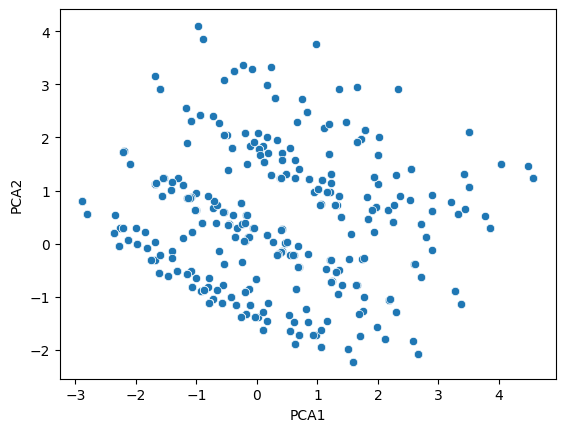

In [21]:
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

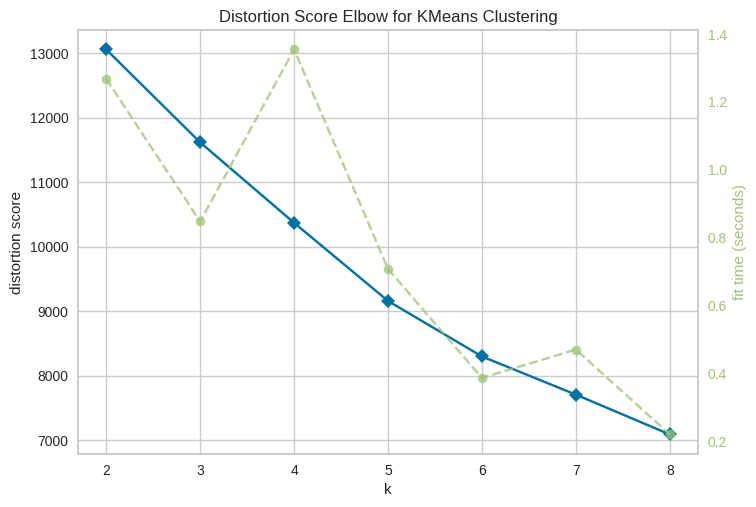

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans_model = KMeans()
visualizer = KElbowVisualizer(kmeans_model, k=(2,9))
visualizer.fit(x_scaled)
visualizer.show()

In [26]:
kmeans = KMeans(4)
kmeans.fit_predict(x_scaled)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


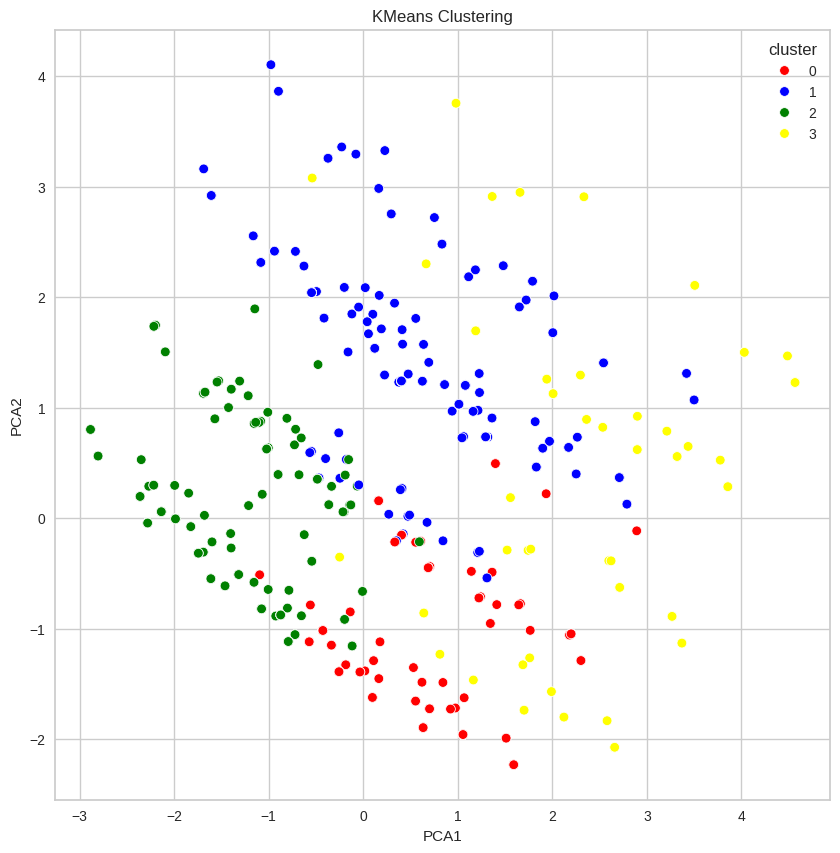

In [27]:
plt.figure(figsize=(10,10))
dia = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette=['red', 'blue', 'green', 'yellow'])
plt.title("KMeans Clustering")
plt.show()

In [30]:
kmeans = KMeans(4)
kmeans.fit_predict(x_scaled)
pca_df_kmeans1 = pd.concat([x,pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-31-0b5873ffacc4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='cluster', data = pca_df_kmeans1, palette = "Set1")


<Axes: xlabel='cluster', ylabel='count'>

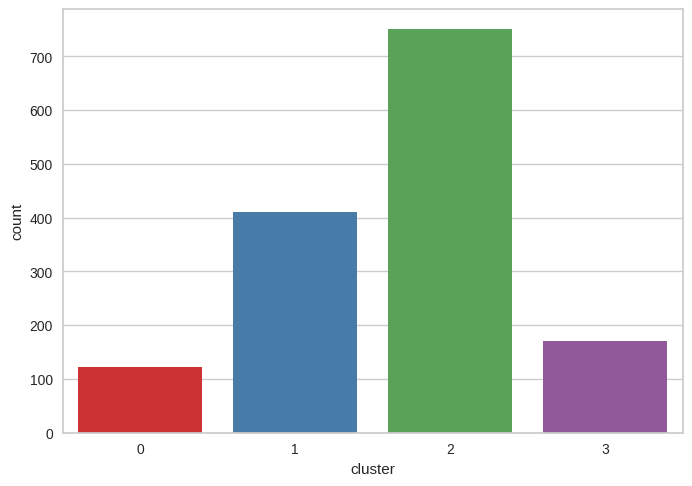

In [31]:
sns.countplot(x ='cluster', data = pca_df_kmeans1, palette = "Set1")

In [32]:
cluster1 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster2 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster3 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster4 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]


<ipython-input-33-1ebc920f6649>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


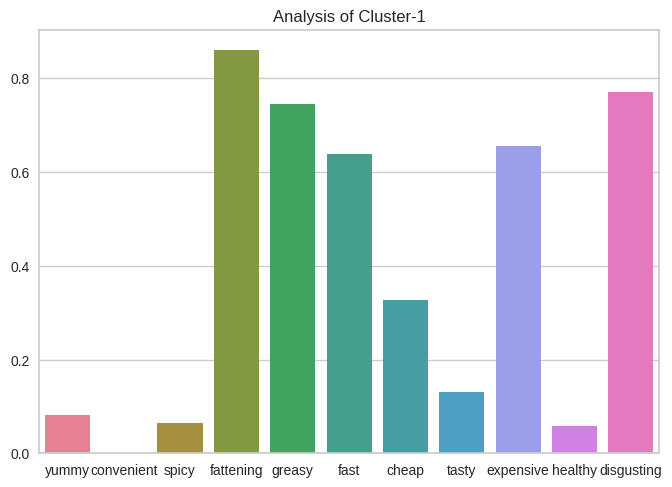

In [33]:
cluster1.head()
dia = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-1')
plt.show()

<ipython-input-34-4f37236e4e4e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


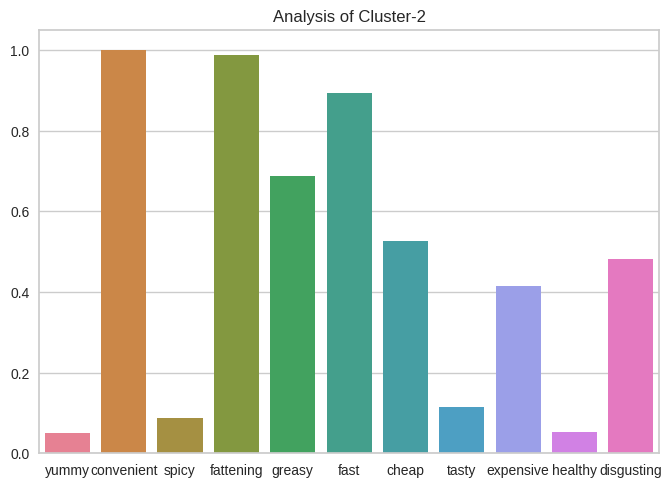

In [34]:
cluster2.head()
dia = sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-2')
plt.show()

<ipython-input-35-6a97cedfb77a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


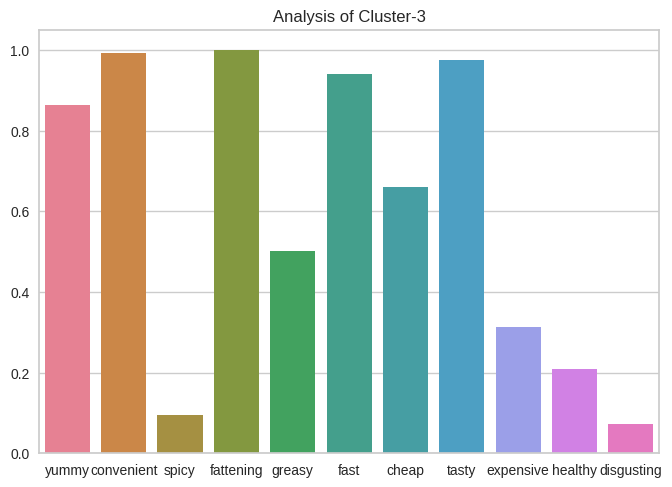

In [35]:
cluster3.head()
dia = sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-3')
plt.show()

<ipython-input-36-6612cb807c04>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


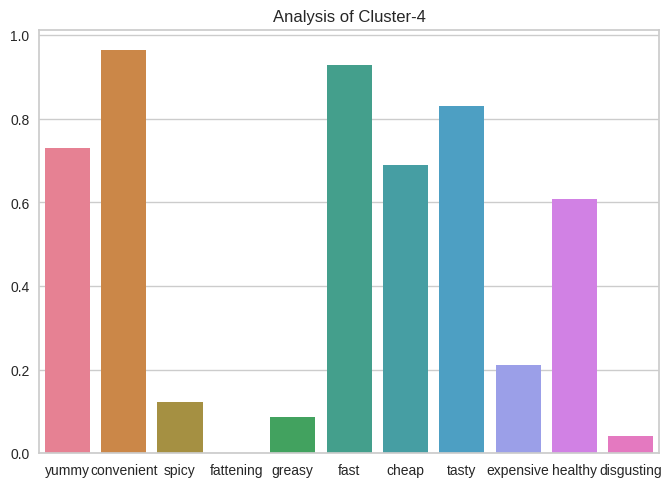

In [36]:
cluster4.head()
dia = sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-4')
plt.show()

In [39]:
data_new= pd.concat([data,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,2
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,2
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,1


In [40]:
data_new['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [57]:
data_new["yummy"] = data_new["yummy"].replace({'Yes':1, 'No':0})
data_new["convenient"] = data_new["convenient"].replace({'Yes':1, 'No':0})
data_new["spicy"] = data_new["spicy"].replace({'Yes':1, 'No':0})
data_new["fattening"] = data_new["fattening"].replace({'Yes':1, 'No':0})
data_new["greasy"] = data_new["greasy"].replace({'Yes':1, 'No':0})
data_new["fast"] = data_new["fast"].replace({'Yes':1, 'No':0})
data_new["cheap"] = data_new["cheap"].replace({'Yes':1, 'No':0})
data_new["tasty"] = data_new["tasty"].replace({'Yes':1, 'No':0})
data_new["expensive"] = data_new["expensive"].replace({'Yes':1, 'No':0})
data_new["healthy"] = data_new["healthy"].replace({'Yes':1, 'No':0})
data_new["disgusting"] = data_new["disgusting"].replace({'Yes':1, 'No':0})

In [58]:
data_new["VisitFrequency"]= data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'Never':5, 'More than once a week':6})


In [59]:
data_new['Like'].value_counts()

Like
8     229
7     187
5     169
9     160
6     152
0     152
10    143
2      73
1      71
3      59
4      58
Name: count, dtype: int64

In [60]:
data_new["Like"]= data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})

In [61]:
data_new['Gender'].value_counts()

Gender
0    788
1    665
Name: count, dtype: int64

In [62]:
data_new["Gender"]= data_new["Gender"].replace({'Female':0, 'Male':1})

In [64]:
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,2
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,2
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,1


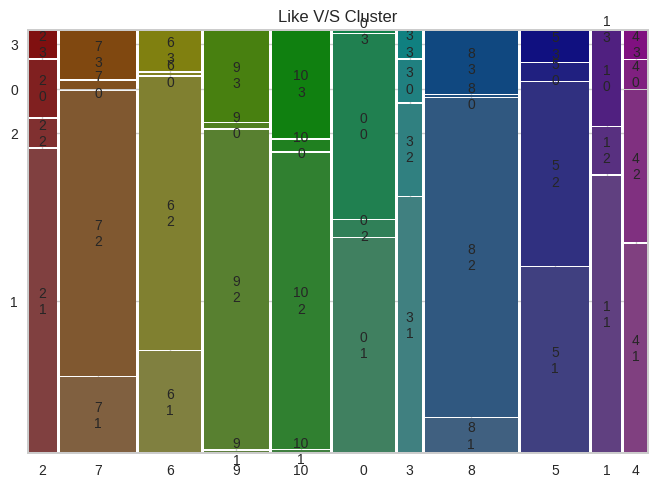

In [65]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data_new, ['Like','cluster'],title='Like V/S Cluster')
plt.show()

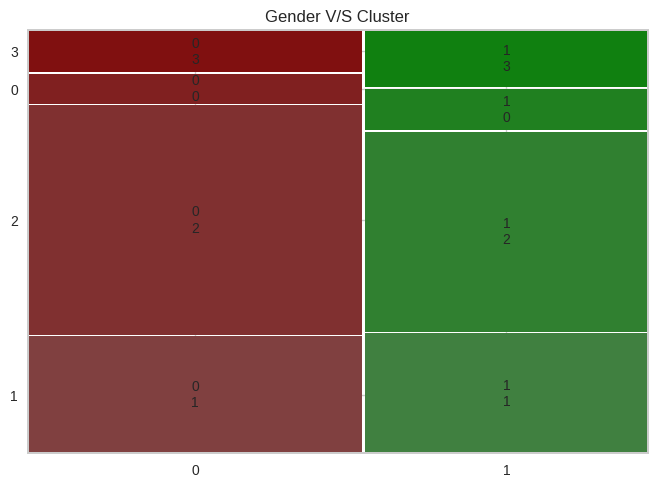

In [66]:
mosaic(data_new, ['Gender','cluster'],title='Gender V/S Cluster')
plt.show()

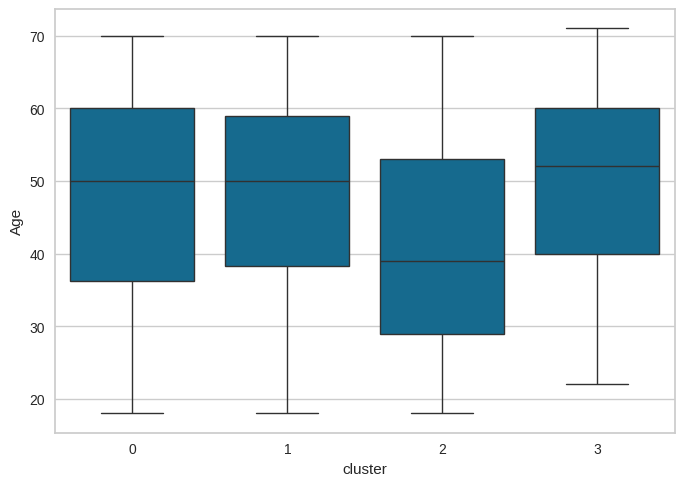

In [67]:
sns.boxplot(x=data_new['cluster'], y=data_new['Age'])
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X = data_new.drop(['cluster'],axis=1)
Y = data_new[['cluster']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [69]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 1 columns):
 #   Column   N

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
model = classifier.fit(X, Y)

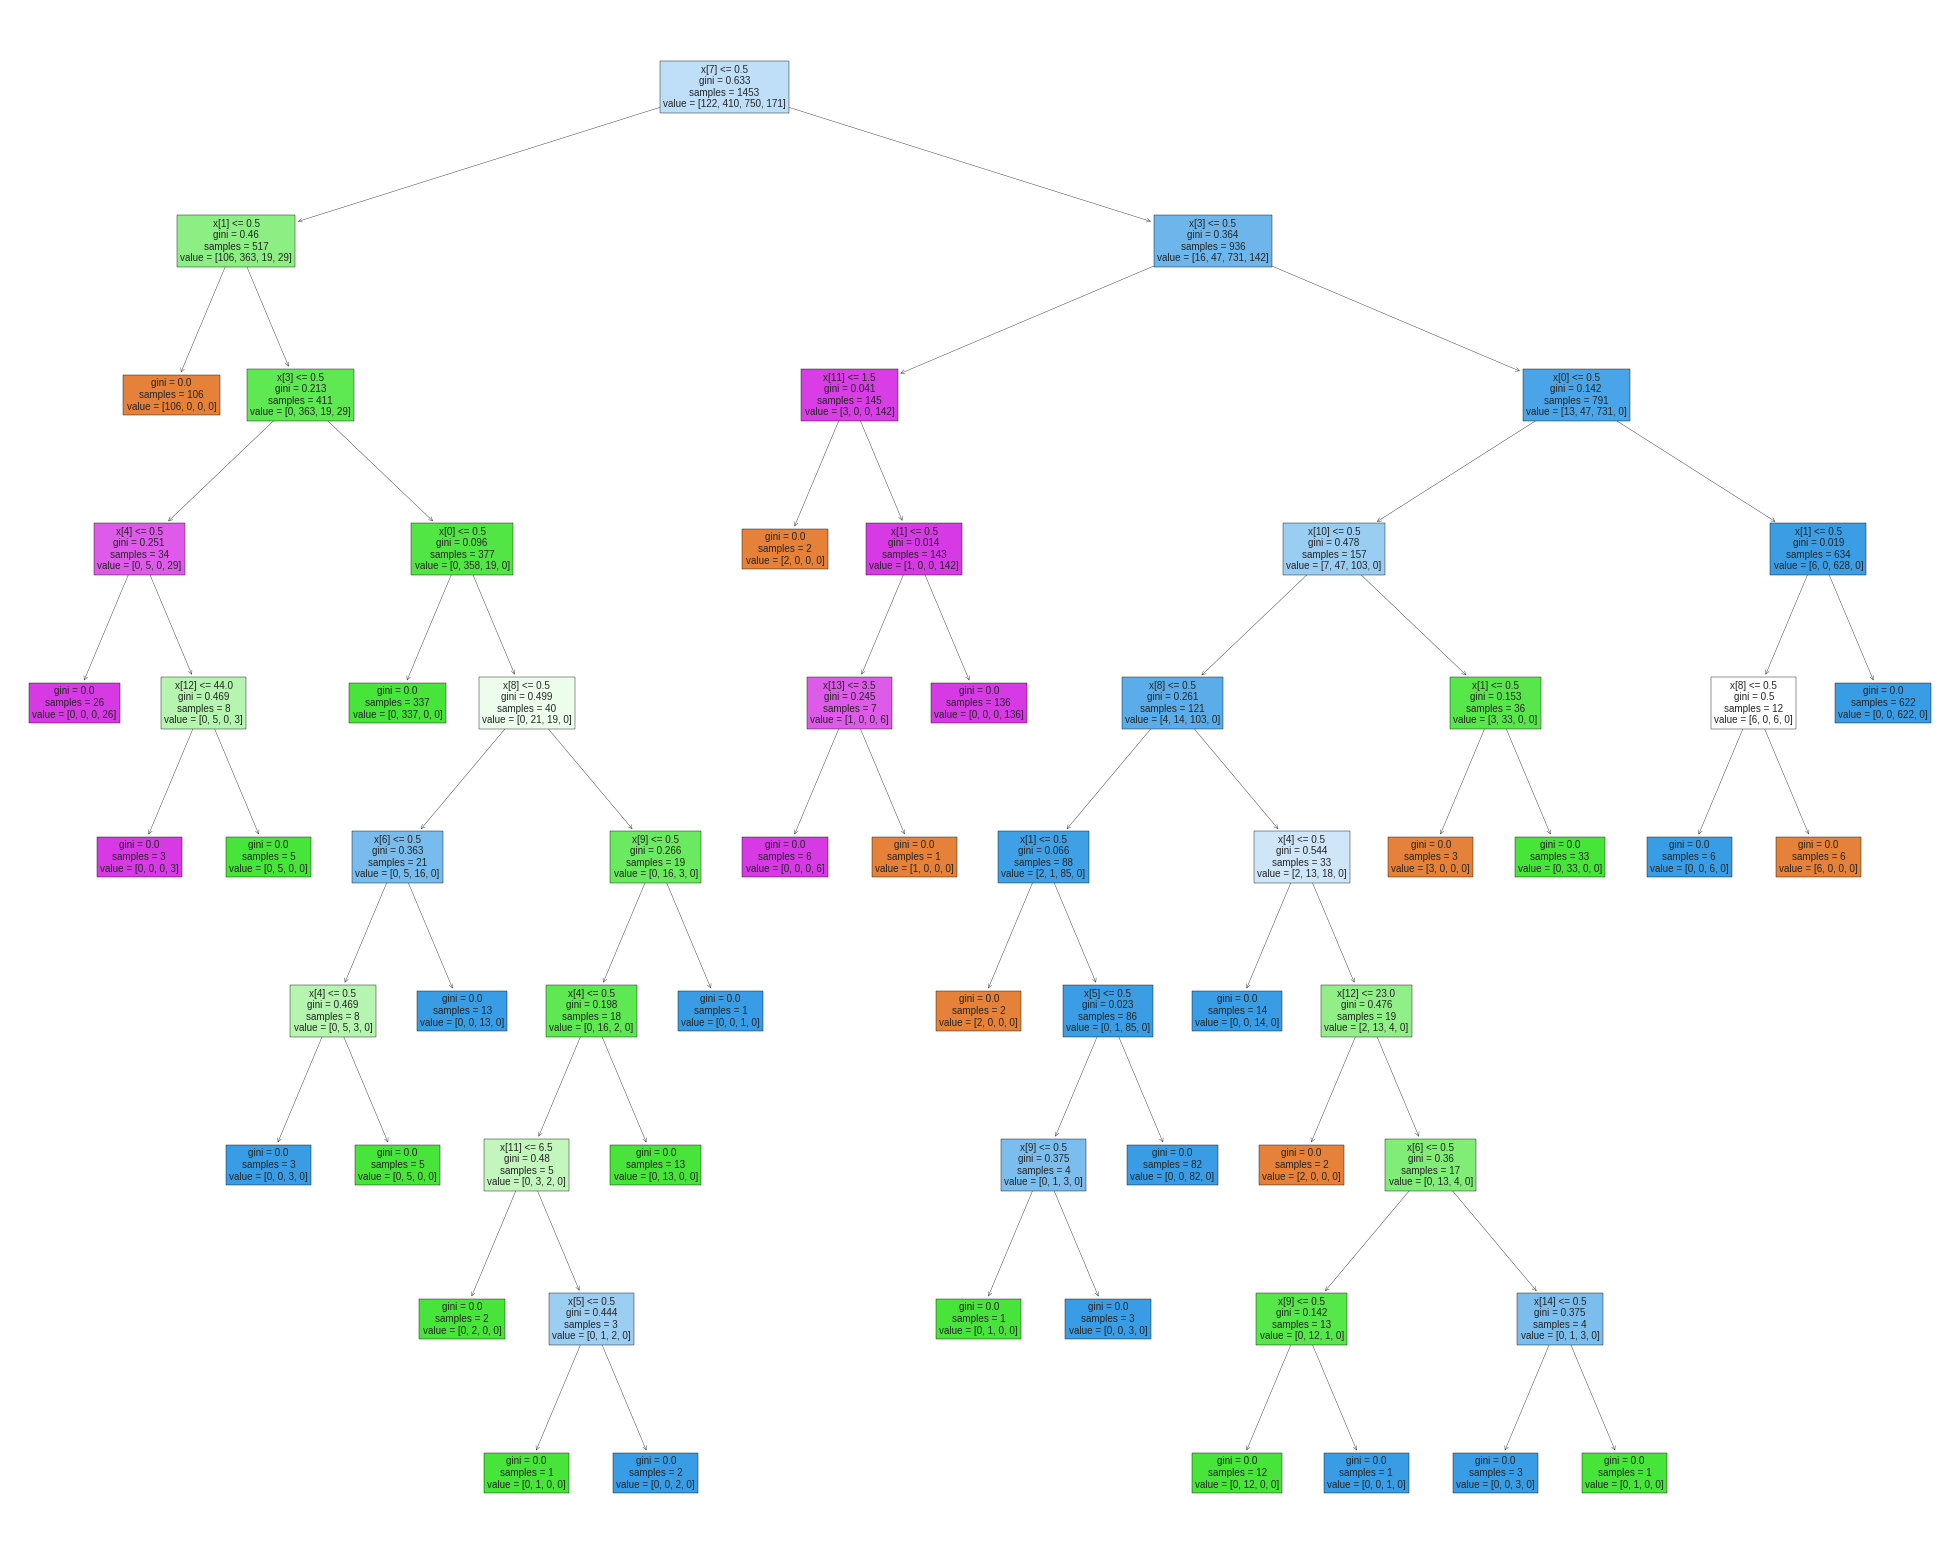

In [71]:
from sklearn import tree
dia = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, filled=True)

In [72]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [73]:
import pickle
filename = 'classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

#again loading the stored model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result*100,'% Accuracy')

99.3127147766323 % Accuracy
